In [24]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [25]:
link = "https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3'"


In [26]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [27]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [28]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [29]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

<ipython-input-29-81a503a95f9e>:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for x in tqdm_notebook(range(160)):


  0%|          | 0/160 [00:00<?, ?it/s]

In [30]:
#Save results to a Dataframe, then export as CSV

df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,Reviewed in India on 17 May 2022
1,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
2,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
3,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,Reviewed in India on 16 December 2021
4,4.0 out of 5 stars\nAmazing product,4.0,The features arre good but there's no speaker ...,Reviewed in India on 26 November 2023
...,...,...,...,...
105,5.0 out of 5 stars\nLaajavab,5.0,यह boAt की स्मार्ट वॉच बहुत अच्छी है बैटरी भी ...,Reviewed in India on 18 November 2023
106,5.0 out of 5 stars\nकम प्राइज में बहुत अच्छा स...,5.0,The media could not be loaded.\n ...,Reviewed in India on 19 October 2023
107,3.0 out of 5 stars\nNot working even after cha...,3.0,The Product is good but after charging its not...,Reviewed in India on 24 October 2023
108,3.0 out of 5 stars\nMusic control,3.0,Music controo not workingNaya replacement k ba...,Reviewed in India on 26 October 2023


In [31]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [46]:
df["Title"]= df["Title"].replace("3.0 out of 5 stars\n", '' , regex = True)
df["Title"]= df["Title"].replace("4.0 out of 5 stars\n", '' , regex = True)
df["Title"]= df["Title"].replace("5.0 out of 5 stars\n", '' , regex = True)
df["Title"]= df["Title"].replace("2.0 out of 5 stars\n", '' , regex = True)
df["Title"]= df["Title"].replace("1.0 out of 5 stars\n", '' , regex = True)

In [47]:
df

,Title,Rating,Review,Review_Date
0,NOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,Best Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,Good build quality & display. But not very smart.,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,Good budget smart watch with Alexa,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
4,Amazing product,4.0,The features arre good but there's no speaker ...,26 November 2023
...,...,...,...,...
105,Laajavab,5.0,यह boAt की स्मार्ट वॉच बहुत अच्छी है बैटरी भी ...,18 November 2023
106,कम प्राइज में बहुत अच्छा स्मार्ट वॉच मिला थैंक...,5.0,The media could not be loaded.\n ...,19 October 2023
107,Not working even after charging,3.0,The Product is good but after charging its not...,24 October 2023
108,Music control,3.0,Music controo not workingNaya replacement k ba...,26 October 2023


In [48]:
df.to_csv("Amazon_Review.csv")


In [49]:
reviews = pd.read_csv('Amazon_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,NOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,Best Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,Good build quality & display. But not very smart.,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,Good budget smart watch with Alexa,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
4,Amazing product,4.0,The features arre good but there's no speaker ...,26 November 2023
...,...,...,...,...
105,Laajavab,5.0,यह boAt की स्मार्ट वॉच बहुत अच्छी है बैटरी भी ...,18 November 2023
106,कम प्राइज में बहुत अच्छा स्मार्ट वॉच मिला थैंक...,5.0,The media could not be loaded.\n ...,19 October 2023
107,Not working even after charging,3.0,The Product is good but after charging its not...,24 October 2023
108,Music control,3.0,Music controo not workingNaya replacement k ba...,26 October 2023


In [50]:
reviews.Rating.describe()

count    110.000000
mean       3.936364
std        0.546503
min        3.000000
25%        4.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: Rating, dtype: float64

In [51]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        110 non-null    object 
 1   Rating       110 non-null    float64
 2   Review       108 non-null    object 
 3   Review_Date  110 non-null    object 
dtypes: float64(1), object(3)
memory usage: 3.6+ KB


2 null values in Review column.

In [52]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,NOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
1,Best Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
2,Good build quality & display. But not very smart.,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
3,Good budget smart watch with Alexa,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021
4,Amazing product,4.0,The features arre good but there's no speaker ...,26 November 2023


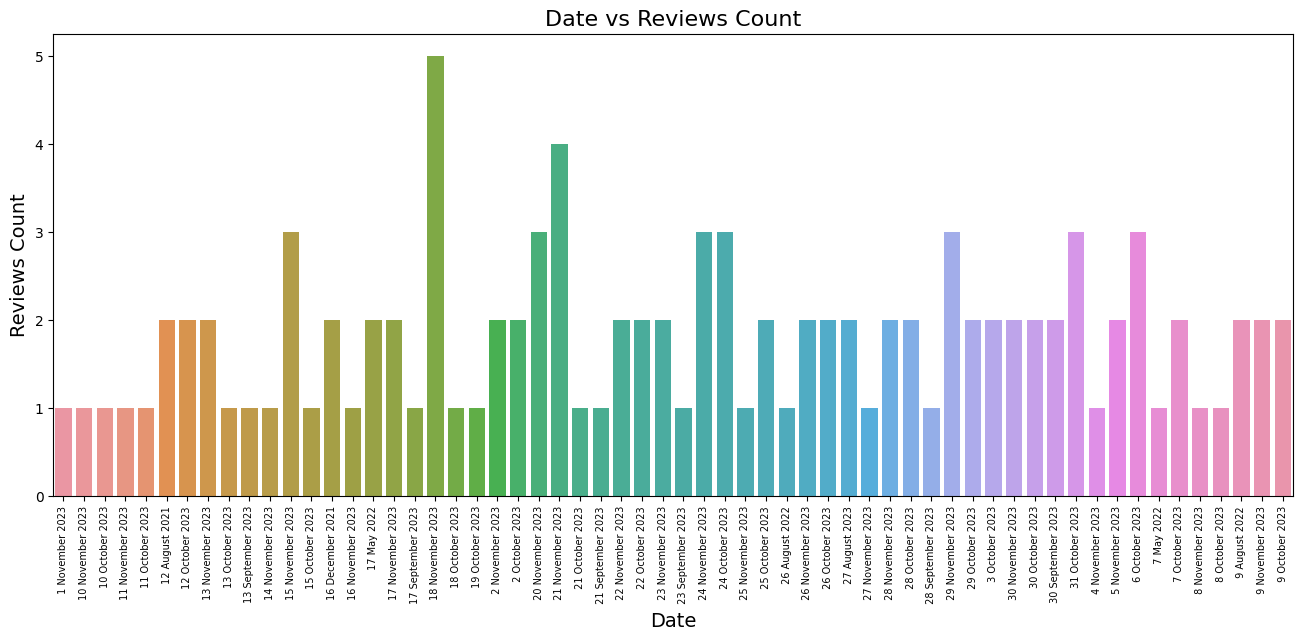

In [53]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

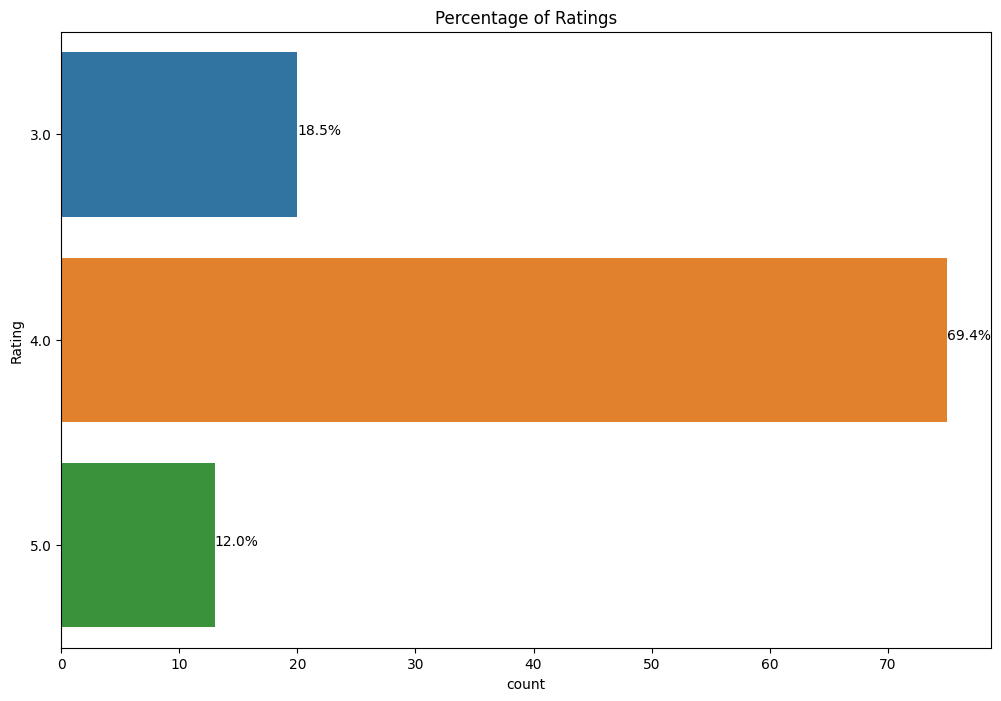

In [54]:
#rating percentage

plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

### Preprocessing for Sentiment Analysis

In [55]:
#spelling correction

reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Review OverviewAverage2.The Coat today launche...
1    The media could not be loaded.\n              ...
2    Shipping the parts mostly covered in other rev...
3    Gros:1. Premium build quality with matter fini...
4    The features are good but there's no speaker t...
Name: Review, dtype: object

In [68]:
boat_review = reviews[['Review']]
boat_review

,Review
1,The media could not be loaded.\n ...
2,Skipping the parts mostly covered in other rev...
3,Pros:1. Premium build quality with matte finis...
4,The features arre good but there's no speaker ...
5,This smart (model Boat extend plus) watch is f...
...,...
105,यह boAt की स्मार्ट वॉच बहुत अच्छी है बैटरी भी ...
106,The media could not be loaded.\n ...
107,The Product is good but after charging its not...
108,Music controo not workingNaya replacement k ba...


### Resetting index

In [69]:
boat_review.reset_index(drop=True, inplace=True)

In [74]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
<ipython-input-74-6b3a0a730f83>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))


### Lemmatizer

In [75]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

<ipython-input-75-536799cef4aa>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, len(boat_review))):


  0%|          | 0/107 [00:00<?, ?it/s]

In [76]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
1,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
2,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
3,feature arre good speaker decline call accept ...,features arre good there's speaker decline cal...
4,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...


### Text Pre-processing Techniques

In [77]:
#Removing @names
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)

    return text

In [78]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
1,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
2,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
3,feature arre good speaker decline call accept ...,features arre good there's speaker decline cal...
4,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,recharging magnet nightmare werable device fri...,recharging magnet nightmare. werable-device fr...
7,sound quality good,sound quality good
8,worst watch worst service application got hang...,worst watch . worst service. application got h...
9,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...


#Removing links (http | https)

In [79]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
1,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
2,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
3,feature arre good speaker decline call accept ...,features arre good there's speaker decline cal...
4,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,recharging magnet nightmare werable device fri...,recharging magnet nightmare. werable-device fr...
7,sound quality good,sound quality good
8,worst watch worst service application got hang...,worst watch . worst service. application got h...
9,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...


###Removing Review with empty text

In [80]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
1,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
2,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
3,feature arre good speaker decline call accept ...,features arre good there's speaker decline cal...
4,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,recharging magnet nightmare werable device fri...,recharging magnet nightmare. werable-device fr...
7,sound quality good,sound quality good
8,worst watch worst service application got hang...,worst watch . worst service. application got h...
9,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...


In [81]:
#D. Dropping duplicate rows

dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
1,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
2,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
3,feature arre good speaker decline call accept ...,features arre good there's speaker decline cal...
4,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,recharging magnet nightmare werable device fri...,recharging magnet nightmare. werable-device fr...
7,sound quality good,sound quality good
8,worst watch worst service application got hang...,worst watch . worst service. application got h...
9,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...


In [83]:
#Removing Stop words
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [84]:
stop.split(" ")


["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [85]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():

    # filerting out all the stopwords
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]

    # finally creating tweets list of tuples containing stopwords(list) and sentimentType
    cleaned_tweets.append(' '.join(words_without_stopwords))

dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...
1,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
2,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...
3,feature arre good speaker decline call accept ...,features arre good there's speaker decline cal...
4,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...
6,recharging magnet nightmare werable device fri...,recharging magnet nightmare. werable-device fr...
7,sound quality good,sound quality good
8,worst watch worst service application got hang...,worst watch . worst service. application got h...
9,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...


In [86]:
#Tokenize 'Clean_Reviews'

TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['skipping', 'part', 'mostly', 'covered', 'review', 'sponsored', 'yt', 'one', 'add', 'irritant', 'common', 'sense', 'disappointment', 'noticed', 'since', 'last', 'day', 'actual', 'usage', 'smart', 'watch', 'aod', 'show', 'date', 'day', 'week', 'show', 'hour', 'min', 'way', 'configure', 'beyond', 'analog', 'digital', 'view', 'also', 'get', 'turned', 'start', 'exercise', 'activity', 'like', 'walking', 'screen', 'go', 'dark', 'go', 'walk', 'calory', 'count', 'home', 'screen', 'anywhere', 'else', 'show', 'step', 'count', 'calorie', 'aggregate', 'calorie', 'burnt', 'exercise', 'activity', 'e', 'step', 'cals', 'cycling', 'show', 'home', 'screen', 'separate', 'two', 'entry', 'app', 'smart', 'enough', 'addition', 'quick', 'way', 'go', 'start', 'activity', 'exercise', 'first', 'press', 'side', 'button', 'twice', 'select', 'activites', 'list', 'menu', 'versus', 'swipe', 'home', 'screen', 'go', 'utterly', 'useless', 'cricket', 'score', 'screen', 'instead', 'many', 'even', 'use', 'customi

In [87]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [medium, could, loaded, used, watch, month, bo...
1    [skipping, part, mostly, covered, review, spon...
2    [pro, premium, build, quality, matte, finishin...
3    [feature, arre, good, speaker, decline, call, ...
4    [smart, model, boat, extend, plus, watch, func...
5    [good, bluetooth, calling, difficult, use, blu...
6    [recharging, magnet, nightmare, werable, devic...
7                               [sound, quality, good]
8    [worst, watch, worst, service, application, go...
9    [review, overviewaverage, boat, today, launche...
Name: Clean_Reviews, dtype: object

In [88]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...,"[medium, could, loaded, used, watch, month, bo..."
1,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
2,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin..."
3,feature arre good speaker decline call accept ...,features arre good there's speaker decline cal...,"[feature, arre, good, speaker, decline, call, ..."
4,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...,"[smart, model, boat, extend, plus, watch, func..."
5,good bluetooth calling difficult use bluetooth...,1. good bluetooth calling difficult use blueto...,"[good, bluetooth, calling, difficult, use, blu..."
6,recharging magnet nightmare werable device fri...,recharging magnet nightmare. werable-device fr...,"[recharging, magnet, nightmare, werable, devic..."
7,sound quality good,sound quality good,"[sound, quality, good]"
8,worst watch worst service application got hang...,worst watch . worst service. application got h...,"[worst, watch, worst, service, application, go..."
9,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."


In [89]:
#Converting words to Stemmer

stemmer = SnowballStemmer("english")

In [90]:
d1 = pd.DataFrame()
d1['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
d1

,stemmed
0,medium could load use watch month bought first...
1,skip part most cover review sponsor yt one add...
2,pro premium build qualiti matt finish sturdi p...
3,featur arr good speaker declin call accept scr...
4,smart model boat extend plus watch function we...
...,...
102,boat
103,medium could load
104,product good charg work need updat product
105,music controo workingnaya replac k bad bhi dus...


In [91]:
#Converting words to Lemma

word_lemmatizer = WordNetLemmatizer()
d2 = pd.DataFrame()
d2['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
d2


,stemmed
0,medium could loaded used watch month bought fi...
1,skipping part mostly covered review sponsored ...
2,pro premium build quality matte finishing stur...
3,feature arre good speaker decline call accept ...
4,smart model boat extend plus watch functioning...
...,...
102,boat
103,medium could loaded
104,product good charging working need update product
105,music controo workingnaya replacement k bad bh...


### Basic Feature Extraction

In [92]:
#Applying bag of Words without N grams
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [94]:
print(cv.get_feature_names_out()[109:200])

['beginning' 'believe' 'belt' 'best' 'better' 'beyond' 'bezel' 'bhi' 'big'
 'bigger' 'bike' 'bip' 'birthday' 'bit' 'black' 'bloated' 'blood'
 'bluetooth' 'boat' 'body' 'bother' 'bought' 'box' 'bp' 'bpm' 'brand'
 'break' 'breath' 'breathing' 'bright' 'brightness' 'brings' 'brother'
 'browsing' 'brushed' 'bt' 'budget' 'bug' 'build' 'buildi' 'built' 'bulb'
 'burnt' 'bus' 'button' 'buy' 'buying' 'cable' 'cache' 'calculated'
 'calculating' 'calculation' 'calculator' 'calender' 'call' 'called'
 'caller' 'callin' 'calling' 'calorie' 'calory' 'cals' 'camera' 'cannot'
 'carddesign' 'care' 'cart' 'case' 'casual' 'category' 'caused' 'center'
 'centerbefore' 'chahiye' 'chahta' 'change' 'changed' 'charge' 'charger'
 'charging' 'charm' 'cheap' 'check' 'checked' 'checking' 'chennai'
 'childish' 'chinese' 'choice' 'choor' 'choose']


In [95]:
print(cv.get_feature_names_out()[:100])

['aaj' 'aaya' 'abhi' 'able' 'absolutely' 'ac' 'accept' 'acceptable'
 'acceptance' 'accepts' 'access' 'accidentally' 'according' 'account'
 'accuracy' 'accuracybatteryyou' 'accuracycomparing' 'accurate'
 'accurately' 'activate' 'activating' 'active' 'activites' 'activity'
 'actual' 'actually' 'adapter' 'add' 'added' 'addition' 'adjust' 'advance'
 'advertised' 'aggregate' 'ago' 'alarm' 'alert' 'alexa' 'allowed' 'allows'
 'almost' 'along' 'alright' 'also' 'aluminium' 'always' 'amazfit'
 'amazing' 'amazon' 'amazoni' 'amezonother' 'amoled' 'amount' 'analog'
 'android' 'angle' 'animal' 'animation' 'anniversary' 'another' 'answer'
 'anyone' 'anyonefor' 'anything' 'anywhere' 'aod' 'apart' 'app'
 'appaccuracyaccuracy' 'appaccuracybatteryfinal' 'appearance' 'appeared'
 'apple' 'application' 'apps' 'appyou' 'around' 'arre' 'aside' 'asks'
 'aspect' 'assistant' 'assisted' 'atm' 'attached' 'attaching' 'attention'
 'attractive' 'audio' 'aur' 'auto' 'available' 'average' 'away' 'awesome'
 'back' 'back

In [96]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [97]:
#CountVectorizer with N-grams (Bigrams & Trigrams)

dataframe = dataframe.reset_index(drop=True)

In [98]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

<ipython-input-98-5671122934bb>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, len(dataframe))):


  0%|          | 0/105 [00:00<?, ?it/s]

In [99]:
corpus[3]

'featur arr good speaker declin call accept screen fragil particularli buy screen guard along prevent small scratch'

In [100]:
#Applying Countvectorizer (Creating the Bag of Words model)
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [101]:
X.shape

(105, 1546)

In [103]:
cv.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ step',
       'actual', 'ad', 'add', 'alarm', 'alarm timer', 'alert', 'alexa',
       'alexa support', 'alexa watch', 'alexa work'], dtype=object)

In [104]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [106]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,absolut,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ step,...,worth,worth price,would,wrist,xtend,xtend smartwatch,xtend watch,ye,year,youtub
0,0,0,0,1,3,1,1,1,3,0,...,0,0,0,0,1,0,1,1,0,0
1,0,1,1,0,0,1,0,0,6,1,...,0,0,0,1,0,0,0,0,0,0
2,1,3,0,0,3,1,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,1,...,1,1,0,1,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [107]:
#TF-IDF Vectorizer
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

<ipython-input-107-188fd0e2a7d0>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, len(dataframe))):


  0%|          | 0/105 [00:00<?, ?it/s]

In [108]:
corpus[4]

'smart model boat extend plu watch function well worth price r batteri begin last day next charg last day last settl one day extens user app amol display good touch featur good access app easili reachabl simpl brows featur sleep measur good take day time nap night time show exactli went sleep woke spo measur neaarer measur person digit instrument heart rate measur also nearer instrument stress also reflect nearli real condit activ step show correct distanc also good watch take bike ride walk show distanc cover set target sport featur check yet fulli check featur function water resist ye water resist check bath drizzl rain time display good number display avail cloud suffici alway featur work model avail featur pleas could skin made avail display wrist put rest rais respect featur function featur alway enabl otherwis function bluetooth call featur good speaker loud enough take call use listen audio video walk ofcours batteri drain quickli messag ye good see notif flash light function ok

In [109]:
#Applying TF-IDF Vectorizer

tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [110]:
tfidf_v.get_feature_names_out()[:20]

array(['absolut', 'accept', 'access', 'account', 'accur', 'accuraci',
       'accuraci sleep', 'accuraci sleep track', 'activ', 'activ step',
       'actual', 'ad', 'add', 'alarm', 'alarm timer', 'alert', 'alexa',
       'alexa support', 'alexa watch', 'alexa work'], dtype=object)

In [111]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [113]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,absolut,accept,access,account,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ step,...,worth,worth price,would,wrist,xtend,xtend smartwatch,xtend watch,ye,year,youtub
0,0.000000,0.000000,0.000000,0.027801,0.069887,0.021845,0.026351,0.026351,0.067590,0.000000,...,0.000000,0.000000,0.0,0.000000,0.025166,0.0,0.026351,0.024164,0.0,0.0
1,0.000000,0.025439,0.027481,0.000000,0.000000,0.023855,0.000000,0.000000,0.147619,0.028775,...,0.000000,0.000000,0.0,0.025439,0.000000,0.0,0.000000,0.000000,0.0,0.0
2,0.031365,0.078846,0.000000,0.000000,0.078846,0.024646,0.029729,0.029729,0.000000,0.000000,...,0.000000,0.000000,0.0,0.026282,0.000000,0.0,0.000000,0.000000,0.0,0.0
3,0.000000,0.193867,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
4,0.000000,0.000000,0.040406,0.000000,0.000000,0.000000,0.000000,0.000000,0.036174,0.042308,...,0.038797,0.044637,0.0,0.037403,0.000000,0.0,0.000000,0.077594,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
103,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0


In [114]:
#Named Entity Recognition (NER)

reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'medium could loaded used watch month bought first sale keep reading unbiased review tip trick ensure function watch working smoothly large curved display price category inch battery heavy usage frequently waking screen alexa alarm notification day standby checking time occassionally day pretty good full charging time hour decent quality magnetic charging cable provided use low power adapter power bank laptop necessary health workout tracking option spo oxymeter heart rate monitor accuracy sleep tracking pretty accurate paedometer accurate time sometimes hundred step added randomly without activity happens randomly day stress monitor also sure calculated sensor fake probably watch contact skin display warning message display data lift wake gesture work second delay manageable tap wake functionality work popular notification whatsapp sm facebook instagram etc read entire sm watch message unless long call picked silenced see caller id reject call bt music control weather update alexa usa

### Parts Of Speech (POS) Tagging

In [115]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [116]:
for token in doc_block[:50]:
    print(token,token.pos_)

medium NOUN
could AUX
loaded VERB
used ADJ
watch NOUN
month NOUN
bought VERB
first ADJ
sale NOUN
keep VERB
reading VERB
unbiased ADJ
review NOUN
tip NOUN
trick NOUN
ensure VERB
function NOUN
watch NOUN
working VERB
smoothly ADV
large ADJ
curved ADJ
display NOUN
price NOUN
category NOUN
inch NOUN
battery NOUN
heavy ADJ
usage NOUN
frequently ADV
waking VERB
screen NOUN
alexa ADJ
alarm NOUN
notification NOUN
day NOUN
standby AUX
checking VERB
time NOUN
occassionally ADV
day NOUN
pretty ADV
good ADJ
full ADJ
charging VERB
time NOUN
hour NOUN
decent ADJ
quality NOUN
magnetic ADJ


In [117]:
#Filtering the nouns and verbs only

nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['face', 'see', 'posted', 'picture', 'boat', 'wave', 'app', 'organized', 'syncs', 'health', 'data', 'issue', 'assisted', 'functionality', 'track', 'running', 'activity', 'map', 'case', 'need', 'data', 'user', 'interface', 'smooth', 'note', 'animation', 'transition', 'use', 'touch', 'screen', 'response', 'feel', 'construction', 'sturdy', 'feel', 'wear', 'water', 'resistance', 'atm', 'take', 'duration', 'pool', 'shower', 'rain', 'worry', 'watch', 'body', 'brushed', 'aluminium', 'body', 'quality', 'plastic', 'strap', 'quality', 'skin', 'wearing', 'duration', 'colour', 'option', 'matching', 'strap', 'strap', 'replaced', 'strap', 'work', 'tested', 'tip', 'trick', 'boat', 'wave', 'app', 'run', 'background', 'time', 'call', 'notification', 'message', 'notification', 'functionality', 'weather', 'update', 'cache', 'background', 'apps', 'phone', 'watch', 'disconnect', 'phone', 'time', 'input', 'keep', 'boat', 'wave', 'app', 'running', 'background', 'people', 'complaining', 'watch', 'clearing']


In [118]:
#Counting the noun & verb tokens

cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,174
1,feature,71
2,boat,65
3,time,61
4,day,54
5,display,50
6,app,44
7,battery,43
8,work,39
9,call,38


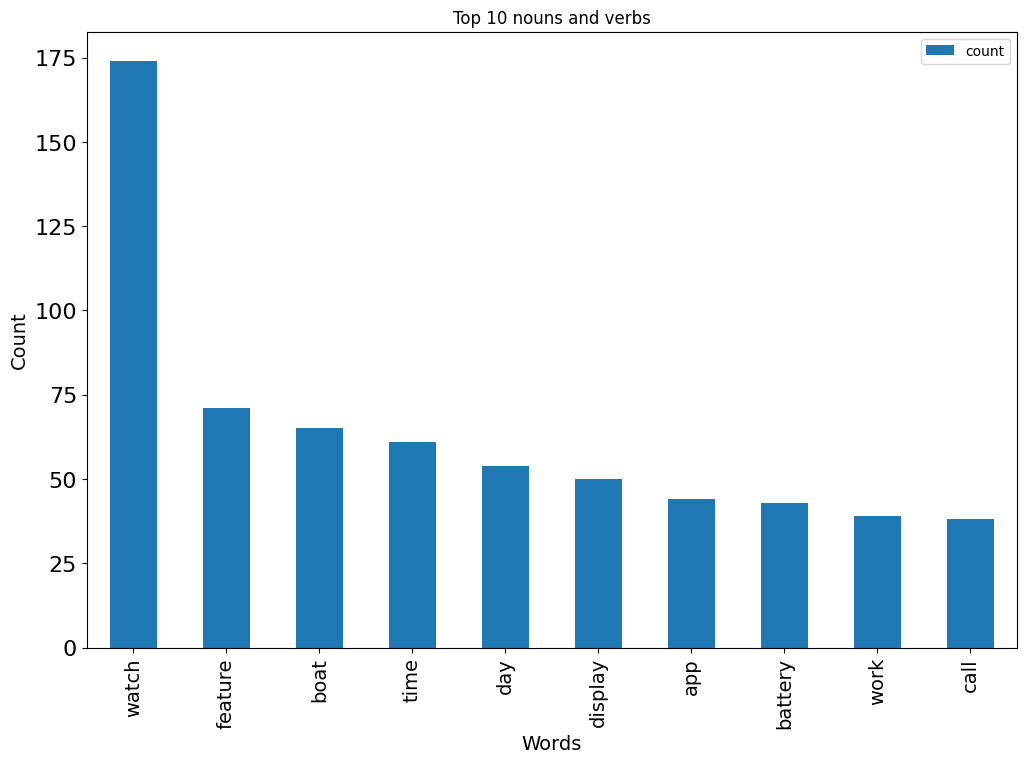

In [119]:
#Visualizing results

wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()


### Feature Extraction

In [120]:
# BOW Features

bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [121]:
#TF-IDF Features

tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

### Fetch sentiments Using TextBlob

In [122]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [123]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,98
neg,7


### Let's calculate subjectivity and Polarity

In [124]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity

# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity

dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()


,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274
1,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266
2,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin...",0.533112,0.292296
3,feature arre good speaker decline call accept ...,features arre good there's speaker decline cal...,"[feature, arre, good, speaker, decline, call, ...",0.458333,0.154167
4,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452


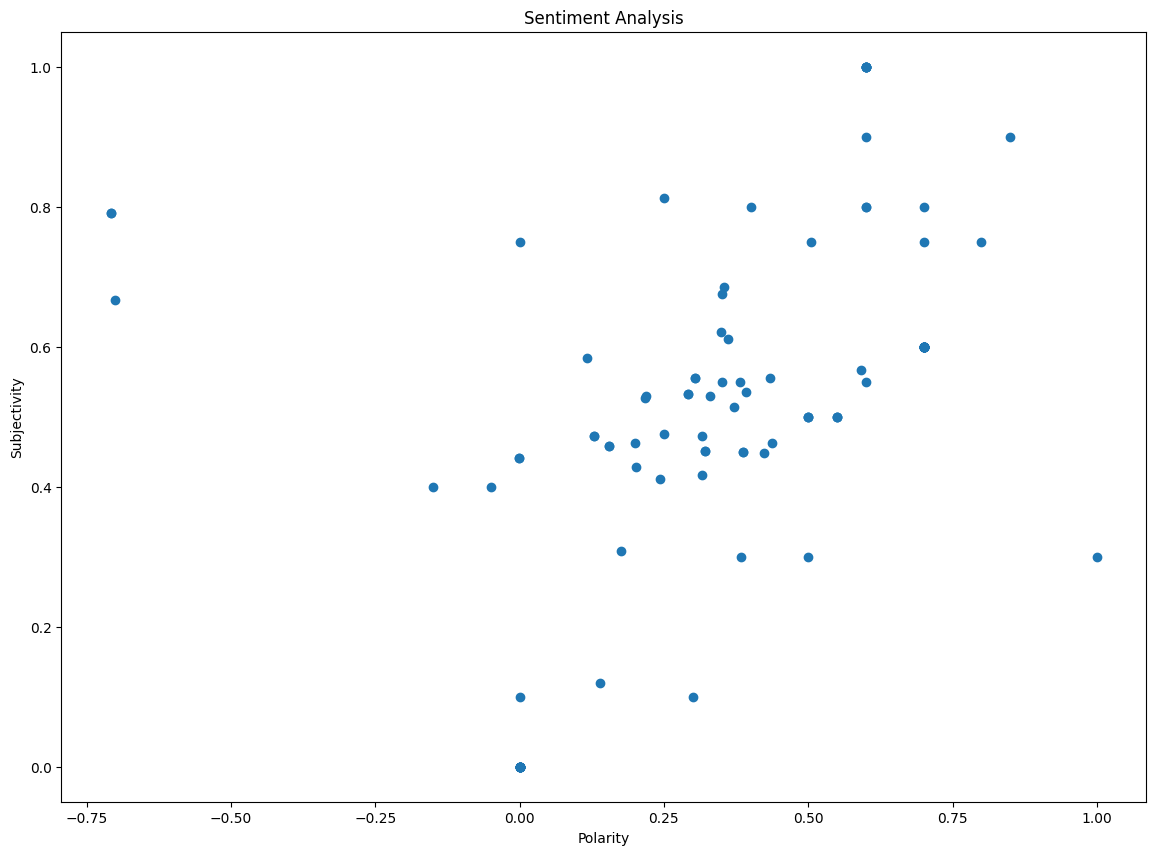

In [125]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [126]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,medium could loaded used watch month bought fi...,media could loaded. used watch month now.. bou...,"[medium, could, loaded, used, watch, month, bo...",0.472013,0.129274,pos
1,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266,neg
2,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin...",0.533112,0.292296,pos
3,feature arre good speaker decline call accept ...,features arre good there's speaker decline cal...,"[feature, arre, good, speaker, decline, call, ...",0.458333,0.154167,pos
4,smart model boat extend plus watch functioning...,smart (model boat extend plus) watch functioni...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452,pos


### Story Generation and Visualization

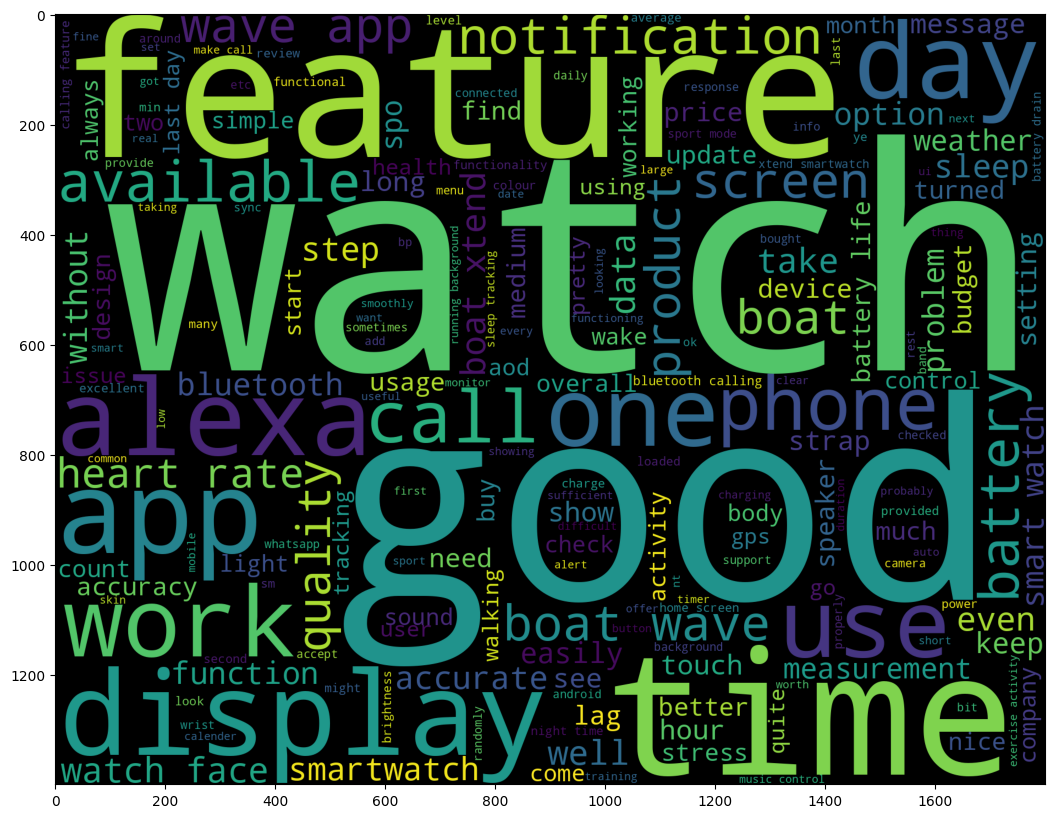

In [127]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

In [128]:
#Most common words in positive Review
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()


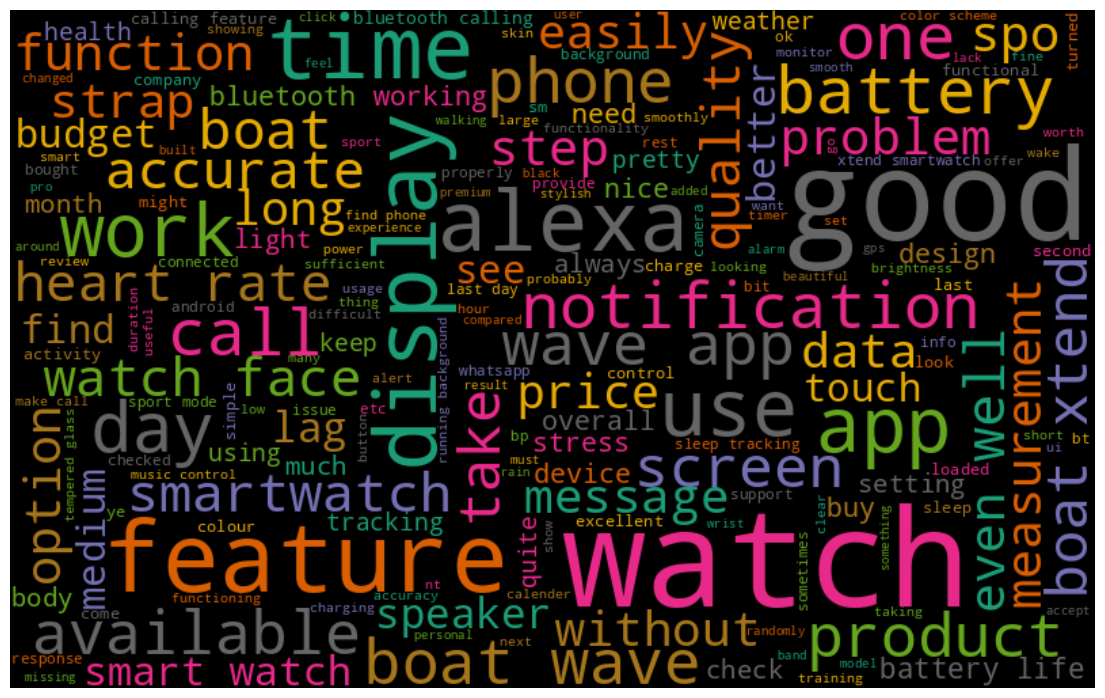

In [129]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

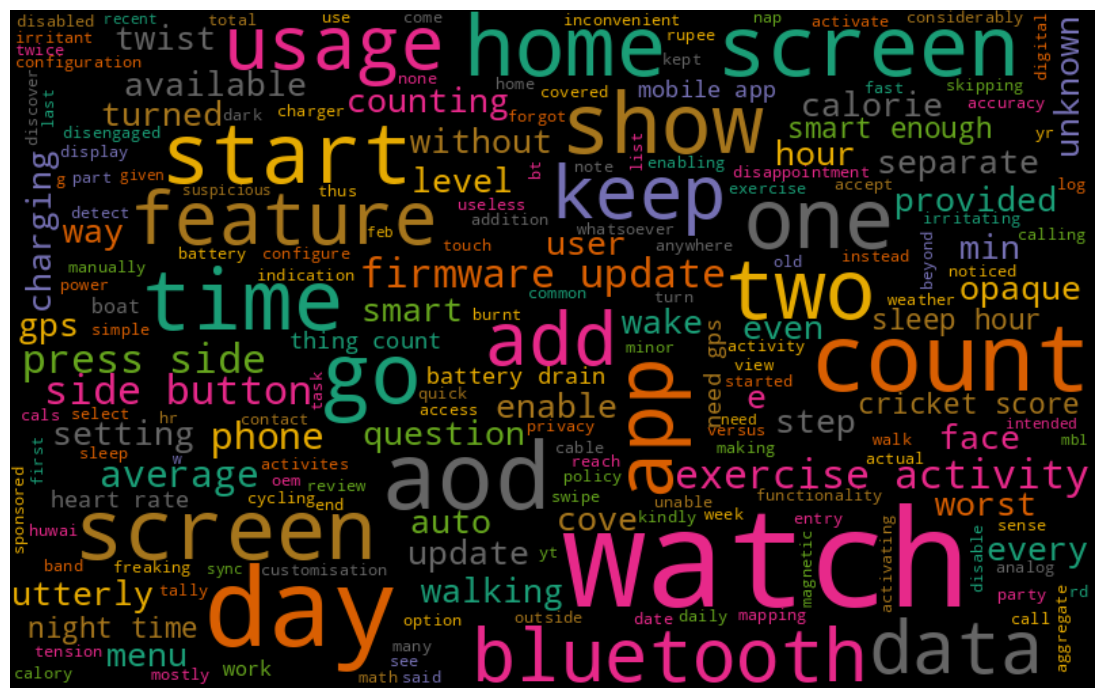

In [130]:
#Most common words in negative Review
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)